乐学偶得版权所有  公众号：乐学Fintech  主讲人：William LX_LAB教研团队提供技术支持 正版视频： 网易云课堂：乐学偶得

前置知识：Moving Average(rolling average/ running average)
之前我们指导了SMA/CMA/WMA/EMA

1.通过tushare获取数据

In [1]:
import tushare as ts
import pandas as pd

In [2]:
ts.set_token("09e4ce601d278a47514902d805936146d469550c6ec9c3b42d1d2343")

In [3]:
pro = ts.pro_api()

In [4]:
df_whole = pro.daily(ts_code="000001.SZ",start_date="20181001",end_date="20191001")

In [5]:
df_whole

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,000001.SZ,20190930,15.75,15.89,15.57,15.59,15.90,-0.31,-1.9497,1046363.17,1645828.526
1,000001.SZ,20190927,15.85,16.00,15.70,15.90,15.71,0.19,1.2094,1007706.27,1598567.052
2,000001.SZ,20190926,15.86,16.04,15.66,15.71,15.75,-0.04,-0.2540,1686592.58,2673096.951
3,000001.SZ,20190925,15.20,15.85,15.19,15.75,15.18,0.57,3.7549,1938892.72,3024598.930
4,000001.SZ,20190924,15.47,15.54,15.18,15.18,15.38,-0.20,-1.3004,1129103.24,1726238.272
5,000001.SZ,20190923,15.34,15.47,15.18,15.38,15.34,0.04,0.2608,1403282.00,2148740.448
6,000001.SZ,20190920,14.95,15.40,14.93,15.34,14.84,0.50,3.3693,2644285.14,4020646.521
7,000001.SZ,20190919,14.48,14.89,14.48,14.84,14.41,0.43,2.9840,1884020.83,2777383.508
8,000001.SZ,20190918,14.24,14.48,14.24,14.41,14.24,0.17,1.1938,820436.33,1179079.988
9,000001.SZ,20190917,14.36,14.45,14.18,14.24,14.45,-0.21,-1.4533,882655.75,1261416.554


In [6]:
df_whole["trade_date"]=pd.to_datetime(df_whole["trade_date"],format="%Y%m%d")

In [7]:
df_whole["trade_date"]

0     2019-09-30
1     2019-09-27
2     2019-09-26
3     2019-09-25
4     2019-09-24
5     2019-09-23
6     2019-09-20
7     2019-09-19
8     2019-09-18
9     2019-09-17
10    2019-09-16
11    2019-09-12
12    2019-09-11
13    2019-09-10
14    2019-09-09
15    2019-09-06
16    2019-09-05
17    2019-09-04
18    2019-09-03
19    2019-09-02
20    2019-08-30
21    2019-08-29
22    2019-08-28
23    2019-08-27
24    2019-08-26
25    2019-08-23
26    2019-08-22
27    2019-08-21
28    2019-08-20
29    2019-08-19
         ...    
213   2018-11-16
214   2018-11-15
215   2018-11-14
216   2018-11-13
217   2018-11-12
218   2018-11-09
219   2018-11-08
220   2018-11-07
221   2018-11-06
222   2018-11-05
223   2018-11-02
224   2018-11-01
225   2018-10-31
226   2018-10-30
227   2018-10-29
228   2018-10-26
229   2018-10-25
230   2018-10-24
231   2018-10-23
232   2018-10-22
233   2018-10-19
234   2018-10-18
235   2018-10-17
236   2018-10-16
237   2018-10-15
238   2018-10-12
239   2018-10-11
240   2018-10-

In [8]:
df_whole.set_index("trade_date",inplace=True)

In [9]:
df_whole

,ts_code,open,high,low,close,pre_close,change,pct_chg,vol,amount
trade_date,,,,,,,,,,
2019-09-30,000001.SZ,15.75,15.89,15.57,15.59,15.90,-0.31,-1.9497,1046363.17,1645828.526
2019-09-27,000001.SZ,15.85,16.00,15.70,15.90,15.71,0.19,1.2094,1007706.27,1598567.052
2019-09-26,000001.SZ,15.86,16.04,15.66,15.71,15.75,-0.04,-0.2540,1686592.58,2673096.951
2019-09-25,000001.SZ,15.20,15.85,15.19,15.75,15.18,0.57,3.7549,1938892.72,3024598.930
2019-09-24,000001.SZ,15.47,15.54,15.18,15.18,15.38,-0.20,-1.3004,1129103.24,1726238.272
2019-09-23,000001.SZ,15.34,15.47,15.18,15.38,15.34,0.04,0.2608,1403282.00,2148740.448
2019-09-20,000001.SZ,14.95,15.40,14.93,15.34,14.84,0.50,3.3693,2644285.14,4020646.521
2019-09-19,000001.SZ,14.48,14.89,14.48,14.84,14.41,0.43,2.9840,1884020.83,2777383.508
2019-09-18,000001.SZ,14.24,14.48,14.24,14.41,14.24,0.17,1.1938,820436.33,1179079.988


In [10]:
df_whole=df_whole.sort_index(ascending=True)

In [11]:
df_whole

,ts_code,open,high,low,close,pre_close,change,pct_chg,vol,amount
trade_date,,,,,,,,,,
2018-10-08,000001.SZ,10.70,10.79,10.45,10.45,11.05,-0.60,-5.4299,1686358.52,1793455.283
2018-10-09,000001.SZ,10.46,10.70,10.39,10.56,10.45,0.11,1.0526,1064084.26,1117946.550
2018-10-10,000001.SZ,10.54,10.66,10.38,10.45,10.56,-0.11,-1.0417,995200.08,1045666.180
2018-10-11,000001.SZ,10.05,10.16,9.70,9.86,10.45,-0.59,-5.6459,1995143.83,1994186.611
2018-10-12,000001.SZ,9.97,10.34,9.87,10.30,9.86,0.44,4.4625,1516810.28,1532651.400
2018-10-15,000001.SZ,10.39,10.47,10.09,10.11,10.30,-0.19,-1.8447,1402685.30,1443043.059
2018-10-16,000001.SZ,10.14,10.54,10.12,10.37,10.11,0.26,2.5717,1396921.05,1450020.371
2018-10-17,000001.SZ,10.50,10.55,10.14,10.33,10.37,-0.04,-0.3857,1350889.83,1400306.336
2018-10-18,000001.SZ,10.29,10.29,10.06,10.09,10.33,-0.24,-2.3233,1001156.05,1015654.821


In [12]:
df_close=df_whole["close"]
type(df_close)

pandas.core.series.Series

In [13]:
df_30_mavg=df_close.rolling(window=30).mean()
df_30_mavg

trade_date
2018-10-08          NaN
2018-10-09          NaN
2018-10-10          NaN
2018-10-11          NaN
2018-10-12          NaN
2018-10-15          NaN
2018-10-16          NaN
2018-10-17          NaN
2018-10-18          NaN
2018-10-19          NaN
2018-10-22          NaN
2018-10-23          NaN
2018-10-24          NaN
2018-10-25          NaN
2018-10-26          NaN
2018-10-29          NaN
2018-10-30          NaN
2018-10-31          NaN
2018-11-01          NaN
2018-11-02          NaN
2018-11-05          NaN
2018-11-06          NaN
2018-11-07          NaN
2018-11-08          NaN
2018-11-09          NaN
2018-11-12          NaN
2018-11-13          NaN
2018-11-14          NaN
2018-11-15          NaN
2018-11-16    10.666667
                ...    
2019-08-19    14.112000
2019-08-20    14.158667
2019-08-21    14.188333
2019-08-22    14.214000
2019-08-23    14.231667
2019-08-26    14.240000
2019-08-27    14.258667
2019-08-28    14.278000
2019-08-29    14.293333
2019-08-30    14.299000
2019-

In [14]:
name = "fake_price"
series = pd.Series([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0 , 10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,1888.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0],name=name).to_frame()

In [15]:
series

,fake_price
0,1.0
1,2.0
2,3.0
3,4.0
4,5.0
5,6.0
6,7.0
7,8.0
8,9.0
9,10.0


In [16]:
import numpy as np

In [17]:
series[name + "_ewma_unadj"]= np.nan
series.loc[0,name + "_ewma_unadj"]=series[name].iloc[0]

In [18]:
series

,fake_price,fake_price_ewma_unadj
0,1.0,1.0
1,2.0,NaN
2,3.0,NaN
3,4.0,NaN
4,5.0,NaN
5,6.0,NaN
6,7.0,NaN
7,8.0,NaN
8,9.0,NaN
9,10.0,NaN


In [19]:
series[name + "_ewma_adj"]= np.nan
series.loc[0,name + "_ewma_adj"]=series[name].iloc[0]

In [20]:
series

,fake_price,fake_price_ewma_unadj,fake_price_ewma_adj
0,1.0,1.0,1.0
1,2.0,NaN,NaN
2,3.0,NaN,NaN
3,4.0,NaN,NaN
4,5.0,NaN,NaN
5,6.0,NaN,NaN
6,7.0,NaN,NaN
7,8.0,NaN,NaN
8,9.0,NaN,NaN
9,10.0,NaN,NaN


In [21]:
period = 5
alpha = 2/(1+period)

In [22]:
for i in range(1,len(series)):
    series.loc[i,name+"_ewma_unadj"]=(1-alpha)*series.loc[i-1,name+"_ewma_unadj"] + \
    alpha * series.loc[i ,name]
    
    ajusted_weights = np.array([(1-alpha)**(i-t) for t in range(i+1)])
    series.loc[i,name+"_ewma_adj"] =np.sum(series.iloc[0:i+1][name].values * ajusted_weights)\
    / ajusted_weights.sum()

In [23]:
series

,fake_price,fake_price_ewma_unadj,fake_price_ewma_adj
0,1.0,1.000000,1.000000
1,2.0,1.333333,1.600000
2,3.0,1.888889,2.263158
3,4.0,2.592593,2.984615
4,5.0,3.395062,3.758294
5,6.0,4.263374,4.577444
6,7.0,5.175583,5.435163
7,8.0,6.117055,6.324822
8,9.0,7.078037,7.240363
9,10.0,8.052025,8.176476


In [24]:
unjusted_calculated_by_pandas = series[name].ewm(span=period,adjust = False).mean()

In [25]:
print("当参数adjusted= False的情况下，我们自己构建的计算EWM函数与直接调用pandas里面的EWM功能之差为 ：" ,
      np.sum(series[name+"_ewma_unadj"] -unjusted_calculated_by_pandas))

当参数adjusted= False的情况下，我们自己构建的计算EWM函数与直接调用pandas里面的EWM功能之差为 ： 0.0


In [26]:
justed_calculated_by_pandas = series[name].ewm(span=period,adjust = True).mean()

In [27]:
print("当参数adjusted= True的情况下，我们自己构建的计算EWM函数与直接调用pandas里面的EWM功能之差为 ：" ,
      np.sum(series[name+"_ewma_adj"] -justed_calculated_by_pandas))

当参数adjusted= True的情况下，我们自己构建的计算EWM函数与直接调用pandas里面的EWM功能之差为 ： 2.318145675417327e-13


In [28]:
justed_calculated_by_pandas

0       1.000000
1       1.600000
2       2.263158
3       2.984615
4       3.758294
5       4.577444
6       5.435163
7       6.324822
8       7.240363
9       8.176476
10      9.128659
11     10.093207
12     11.067142
13     12.048122
14     13.034333
15     14.024396
16     15.017272
17    639.767579
18    432.751669
19    295.126391
20    203.732604
21    143.146972
22    103.094412
23     76.728042
24     59.484678
25     48.322824
26     41.215091
27     36.810009
28     34.206652
29     32.804428
Name: fake_price, dtype: float64

In [29]:
# import talib
# import numpy as np
# talib.EMA(np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0 , 10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,1888.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0]),5)

In [30]:
series

,fake_price,fake_price_ewma_unadj,fake_price_ewma_adj
0,1.0,1.000000,1.000000
1,2.0,1.333333,1.600000
2,3.0,1.888889,2.263158
3,4.0,2.592593,2.984615
4,5.0,3.395062,3.758294
5,6.0,4.263374,4.577444
6,7.0,5.175583,5.435163
7,8.0,6.117055,6.324822
8,9.0,7.078037,7.240363
9,10.0,8.052025,8.176476


In [31]:
series["ema5_adj"]= pd.Series.ewm(series["fake_price"],span=5 , adjust = True).mean()

In [32]:
series

,fake_price,fake_price_ewma_unadj,fake_price_ewma_adj,ema5_adj
0,1.0,1.000000,1.000000,1.000000
1,2.0,1.333333,1.600000,1.600000
2,3.0,1.888889,2.263158,2.263158
3,4.0,2.592593,2.984615,2.984615
4,5.0,3.395062,3.758294,3.758294
5,6.0,4.263374,4.577444,4.577444
6,7.0,5.175583,5.435163,5.435163
7,8.0,6.117055,6.324822,6.324822
8,9.0,7.078037,7.240363,7.240363
9,10.0,8.052025,8.176476,8.176476


In [33]:
series["ema5_unadj"]= pd.Series.ewm(series["fake_price"],span=5 , adjust = False).mean()

In [34]:
series

,fake_price,fake_price_ewma_unadj,fake_price_ewma_adj,ema5_adj,ema5_unadj
0,1.0,1.000000,1.000000,1.000000,1.000000
1,2.0,1.333333,1.600000,1.600000,1.333333
2,3.0,1.888889,2.263158,2.263158,1.888889
3,4.0,2.592593,2.984615,2.984615,2.592593
4,5.0,3.395062,3.758294,3.758294,3.395062
5,6.0,4.263374,4.577444,4.577444,4.263374
6,7.0,5.175583,5.435163,5.435163,5.175583
7,8.0,6.117055,6.324822,6.324822,6.117055
8,9.0,7.078037,7.240363,7.240363,7.078037
9,10.0,8.052025,8.176476,8.176476,8.052025


In [35]:
series["ema12_adj"]= pd.Series.ewm(series["fake_price"],span=12 , adjust = True).mean()

In [36]:
series["ema26_adj"]= pd.Series.ewm(series["fake_price"],span=26 , adjust = True).mean()

In [37]:
# series["ema9_adj"]= pd.Series.ewm(series["fake_price"],span=9 , adjust = True).mean()

In [38]:
series

,fake_price,fake_price_ewma_unadj,fake_price_ewma_adj,ema5_adj,ema5_unadj,ema12_adj,ema26_adj
0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2.0,1.333333,1.600000,1.600000,1.333333,1.541667,1.519231
2,3.0,1.888889,2.263158,2.263158,1.888889,2.110855,2.051257
3,4.0,2.592593,2.984615,2.984615,2.592593,2.707184,2.596040
4,5.0,3.395062,3.758294,3.758294,3.395062,3.330134,3.153528
5,6.0,4.263374,4.577444,4.577444,4.263374,3.979052,3.723654
6,7.0,5.175583,5.435163,5.435163,5.175583,4.653166,4.306335
7,8.0,6.117055,6.324822,6.324822,6.117055,5.351599,4.901476
8,9.0,7.078037,7.240363,7.240363,7.078037,6.073382,5.508967
9,10.0,8.052025,8.176476,8.176476,8.052025,6.817475,6.128686


12_ema = fast (快线) ， 26_ema slow(慢线)
1）MACD Line(MACD线)  12ema-26 ema
2）Signal Line（信号线） =  9ema of the MACD Line(信号线)
3）Histogram(柱状图) = MACD Line - Signal Line


In [39]:
LXOD_MACD=series["ema12_adj"]-series["ema26_adj"]

In [40]:
type(LXOD_MACD)

pandas.core.series.Series

In [41]:
LXOD_MACD

0       0.000000
1       0.022436
2       0.059598
3       0.111144
4       0.176605
5       0.255398
6       0.346831
7       0.450122
8       0.564415
9       0.688789
10      0.822279
11      0.963891
12      1.112617
13      1.267445
14      1.427379
15      1.591446
16      1.758704
17    119.831499
18     89.219899
19     64.614638
20     44.895668
21     29.161159
22     16.680532
23      6.858967
24     -0.789779
25     -6.664468
26    -11.092922
27    -14.345124
28    -16.643687
29    -18.172286
dtype: float64

In [42]:
LXOD_Signal_Line=LXOD_MACD.ewm(span=9,adjust=True).mean()

In [43]:
LXOD_Signal_Line

0      0.000000
1      0.012464
2      0.031781
3      0.058666
4      0.093750
5      0.137566
6      0.190525
7      0.252911
8      0.324870
9      0.406409
10     0.497399
11     0.597582
12     0.706581
13     0.823914
14     0.949009
15     1.081217
16     1.219836
17    25.377352
18    38.332566
19    43.650289
20    43.901684
21    40.931664
22    36.052637
23    30.186199
24    23.967510
25    17.822543
26    12.025433
27     6.741100
28     2.056894
29    -1.993956
dtype: float64

In [44]:
Histogram=LXOD_MACD-LXOD_Signal_Line

In [45]:
type(Histogram)

pandas.core.series.Series

In [46]:
df_whole.head()

,ts_code,open,high,low,close,pre_close,change,pct_chg,vol,amount
trade_date,,,,,,,,,,
2018-10-08,000001.SZ,10.70,10.79,10.45,10.45,11.05,-0.60,-5.4299,1686358.52,1793455.283
2018-10-09,000001.SZ,10.46,10.70,10.39,10.56,10.45,0.11,1.0526,1064084.26,1117946.550
2018-10-10,000001.SZ,10.54,10.66,10.38,10.45,10.56,-0.11,-1.0417,995200.08,1045666.180
2018-10-11,000001.SZ,10.05,10.16,9.70,9.86,10.45,-0.59,-5.6459,1995143.83,1994186.611
2018-10-12,000001.SZ,9.97,10.34,9.87,10.30,9.86,0.44,4.4625,1516810.28,1532651.400


In [47]:
df_whole["ema12_adj"]=pd.Series.ewm(df_whole["close"],span=12 , adjust = True).mean()

In [48]:
df_whole.head()

,ts_code,open,high,low,close,pre_close,change,pct_chg,vol,amount,ema12_adj
trade_date,,,,,,,,,,,
2018-10-08,000001.SZ,10.70,10.79,10.45,10.45,11.05,-0.60,-5.4299,1686358.52,1793455.283,10.450000
2018-10-09,000001.SZ,10.46,10.70,10.39,10.56,10.45,0.11,1.0526,1064084.26,1117946.550,10.509583
2018-10-10,000001.SZ,10.54,10.66,10.38,10.45,10.56,-0.11,-1.0417,995200.08,1045666.180,10.486328
2018-10-11,000001.SZ,10.05,10.16,9.70,9.86,10.45,-0.59,-5.6459,1995143.83,1994186.611,10.288621
2018-10-12,000001.SZ,9.97,10.34,9.87,10.30,9.86,0.44,4.4625,1516810.28,1532651.400,10.291712


In [49]:
df_whole["ema26_adj"]=pd.Series.ewm(df_whole["close"],span=26 , adjust = True).mean()

In [50]:
df_whole.head()

,ts_code,open,high,low,close,pre_close,change,pct_chg,vol,amount,ema12_adj,ema26_adj
trade_date,,,,,,,,,,,,
2018-10-08,000001.SZ,10.70,10.79,10.45,10.45,11.05,-0.60,-5.4299,1686358.52,1793455.283,10.450000,10.450000
2018-10-09,000001.SZ,10.46,10.70,10.39,10.56,10.45,0.11,1.0526,1064084.26,1117946.550,10.509583,10.507115
2018-10-10,000001.SZ,10.54,10.66,10.38,10.45,10.56,-0.11,-1.0417,995200.08,1045666.180,10.486328,10.486594
2018-10-11,000001.SZ,10.05,10.16,9.70,9.86,10.45,-0.59,-5.6459,1995143.83,1994186.611,10.288621,10.311426
2018-10-12,000001.SZ,9.97,10.34,9.87,10.30,9.86,0.44,4.4625,1516810.28,1532651.400,10.291712,10.308776


In [51]:
LXOD_MACD=df_whole["ema12_adj"]-df_whole["ema26_adj"]

In [52]:
LXOD_MACD

trade_date
2018-10-08    0.000000
2018-10-09    0.002468
2018-10-10   -0.000266
2018-10-11   -0.022805
2018-10-12   -0.017064
2018-10-15   -0.021416
2018-10-16   -0.012060
2018-10-17   -0.007495
2018-10-18   -0.016127
2018-10-19    0.012496
2018-10-22    0.053781
2018-10-23    0.066289
2018-10-24    0.085984
2018-10-25    0.114098
2018-10-26    0.127316
2018-10-29    0.109667
2018-10-30    0.104129
2018-10-31    0.099240
2018-11-01    0.089143
2018-11-02    0.097234
2018-11-05    0.091072
2018-11-06    0.079850
2018-11-07    0.068163
2018-11-08    0.063780
2018-11-09    0.035991
2018-11-12    0.014638
2018-11-13   -0.003587
2018-11-14   -0.024907
2018-11-15   -0.028275
2018-11-16   -0.034209
                ...   
2019-08-19    0.330785
2019-08-20    0.338401
2019-08-21    0.297435
2019-08-22    0.250781
2019-08-23    0.238494
2019-08-26    0.194240
2019-08-27    0.162142
2019-08-28    0.131954
2019-08-29    0.095631
2019-08-30    0.068477
2019-09-02    0.069555
2019-09-03    0.057642


In [53]:
df_whole["signal_line"]=pd.Series.ewm(LXOD_MACD,span=9 , adjust = True).mean()

In [54]:
df_whole

,ts_code,open,high,low,close,pre_close,change,pct_chg,vol,amount,ema12_adj,ema26_adj,signal_line
trade_date,,,,,,,,,,,,,
2018-10-08,000001.SZ,10.70,10.79,10.45,10.45,11.05,-0.60,-5.4299,1686358.52,1793455.283,10.450000,10.450000,0.000000
2018-10-09,000001.SZ,10.46,10.70,10.39,10.56,10.45,0.11,1.0526,1064084.26,1117946.550,10.509583,10.507115,0.001371
2018-10-10,000001.SZ,10.54,10.66,10.38,10.45,10.56,-0.11,-1.0417,995200.08,1045666.180,10.486328,10.486594,0.000700
2018-10-11,000001.SZ,10.05,10.16,9.70,9.86,10.45,-0.59,-5.6459,1995143.83,1994186.611,10.288621,10.311426,-0.007263
2018-10-12,000001.SZ,9.97,10.34,9.87,10.30,9.86,0.44,4.4625,1516810.28,1532651.400,10.291712,10.308776,-0.010178
2018-10-15,000001.SZ,10.39,10.47,10.09,10.11,10.30,-0.19,-1.8447,1402685.30,1443043.059,10.247547,10.268963,-0.013224
2018-10-16,000001.SZ,10.14,10.54,10.12,10.37,10.11,0.26,2.5717,1396921.05,1450020.371,10.274872,10.286932,-0.012930
2018-10-17,000001.SZ,10.50,10.55,10.14,10.33,10.37,-0.04,-0.3857,1350889.83,1400306.336,10.286376,10.293871,-0.011624
2018-10-18,000001.SZ,10.29,10.29,10.06,10.09,10.33,-0.24,-2.3233,1001156.05,1015654.821,10.247526,10.263653,-0.012664


In [55]:
df_whole["LXOD_MACD"]=LXOD_MACD

In [56]:
df_whole.head()

,ts_code,open,high,low,close,pre_close,change,pct_chg,vol,amount,ema12_adj,ema26_adj,signal_line,LXOD_MACD
trade_date,,,,,,,,,,,,,,
2018-10-08,000001.SZ,10.70,10.79,10.45,10.45,11.05,-0.60,-5.4299,1686358.52,1793455.283,10.450000,10.450000,0.000000,0.000000
2018-10-09,000001.SZ,10.46,10.70,10.39,10.56,10.45,0.11,1.0526,1064084.26,1117946.550,10.509583,10.507115,0.001371,0.002468
2018-10-10,000001.SZ,10.54,10.66,10.38,10.45,10.56,-0.11,-1.0417,995200.08,1045666.180,10.486328,10.486594,0.000700,-0.000266
2018-10-11,000001.SZ,10.05,10.16,9.70,9.86,10.45,-0.59,-5.6459,1995143.83,1994186.611,10.288621,10.311426,-0.007263,-0.022805
2018-10-12,000001.SZ,9.97,10.34,9.87,10.30,9.86,0.44,4.4625,1516810.28,1532651.400,10.291712,10.308776,-0.010178,-0.017064


Histogram(柱状图) = MACD Line - Signal Line

In [57]:
df_whole["Histo"]=df_whole["LXOD_MACD"]-df_whole["signal_line"]

In [58]:
df_whole.head()

,ts_code,open,high,low,close,pre_close,change,pct_chg,vol,amount,ema12_adj,ema26_adj,signal_line,LXOD_MACD,Histo
trade_date,,,,,,,,,,,,,,,
2018-10-08,000001.SZ,10.70,10.79,10.45,10.45,11.05,-0.60,-5.4299,1686358.52,1793455.283,10.450000,10.450000,0.000000,0.000000,0.000000
2018-10-09,000001.SZ,10.46,10.70,10.39,10.56,10.45,0.11,1.0526,1064084.26,1117946.550,10.509583,10.507115,0.001371,0.002468,0.001097
2018-10-10,000001.SZ,10.54,10.66,10.38,10.45,10.56,-0.11,-1.0417,995200.08,1045666.180,10.486328,10.486594,0.000700,-0.000266,-0.000966
2018-10-11,000001.SZ,10.05,10.16,9.70,9.86,10.45,-0.59,-5.6459,1995143.83,1994186.611,10.288621,10.311426,-0.007263,-0.022805,-0.015543
2018-10-12,000001.SZ,9.97,10.34,9.87,10.30,9.86,0.44,4.4625,1516810.28,1532651.400,10.291712,10.308776,-0.010178,-0.017064,-0.006886


<IPython.core.display.Javascript object>


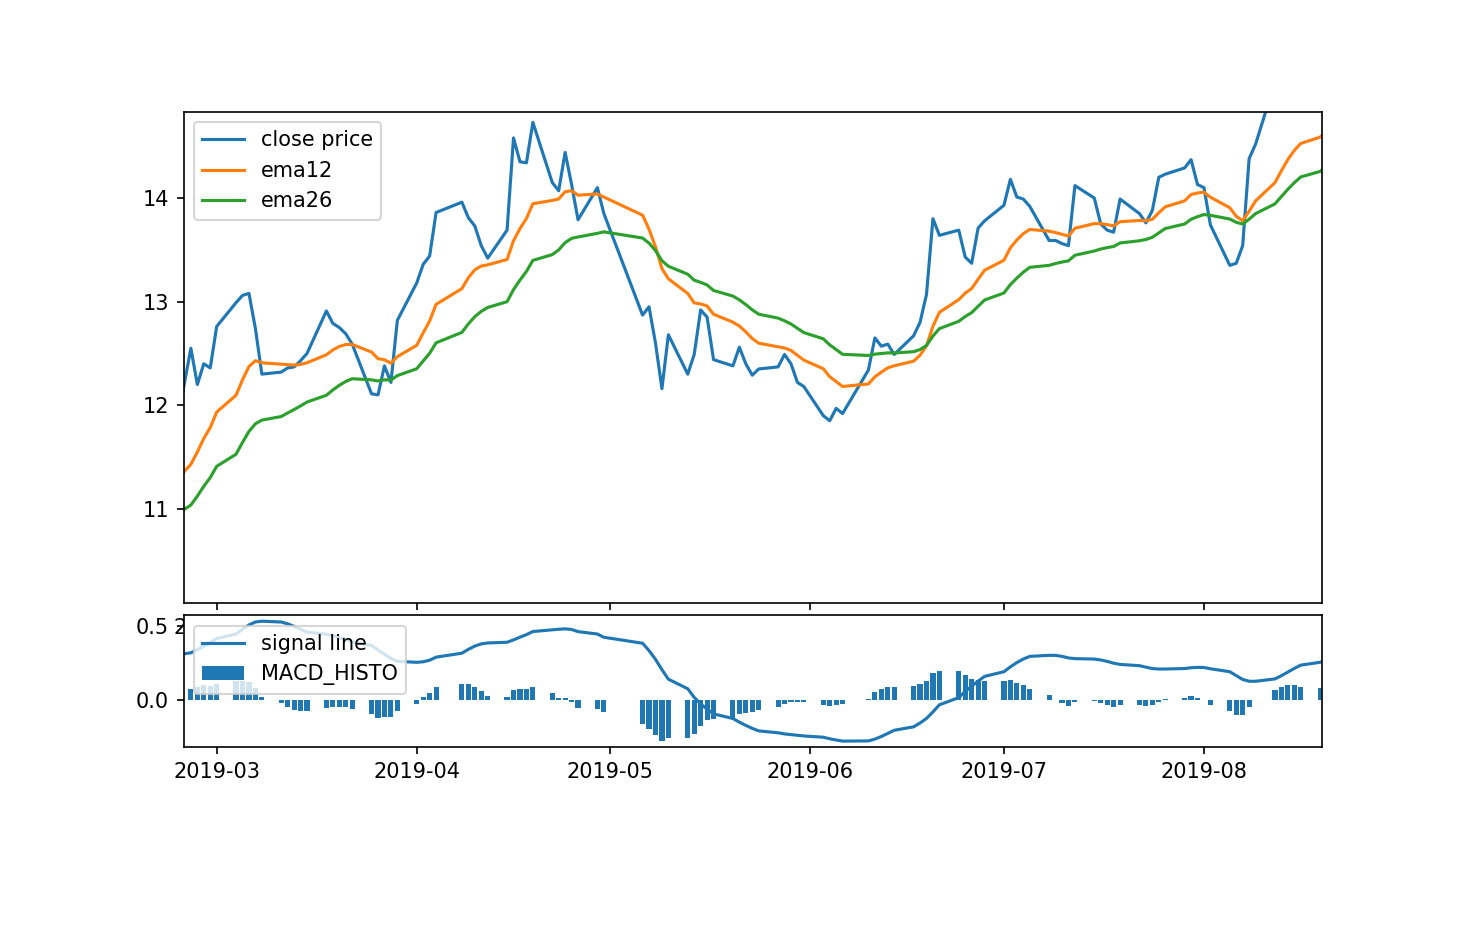

In [63]:
import matplotlib.pyplot as plt
%matplotlib notebook
df_whole["ema12_adj"].plot()
df_whole["ema26_adj"].plot()
df_whole["close"].plot()
df_whole["signal_line"].plot()

plt.legend()


In [120]:
ax1= plt.subplot2grid((9,10),(0,0),rowspan = 7,colspan=10)
ax2= plt.subplot2grid((9,10),(7,0),rowspan = 7,colspan=10,sharex=ax1)

In [121]:
ax1.plot(df_whole.index,df_whole["close"],label="close price")
ax1.plot(df_whole.index,df_whole["ema12_adj"],label="ema12")
ax1.plot(df_whole.index,df_whole["ema26_adj"],label="ema26")

In [122]:
ax2.bar(df_whole.index,df_whole["Histo"],label="MACD_HISTO")
ax2.plot(df_whole.index,df_whole["signal_line"],label="signal line")

In [123]:
ax1.legend()
ax2.legend(loc="upper left")

不要禁锢于这些说法！这些只是前人的知识，与经验而谈的指标

*概念辨析：

1."signal_line"（信号线）/DEA（离差平均值）= ema（dif,9）
2.MACD/ DIF(离差值)=ema(close,12)-ema(close,26)
3.Histogram/Bar = (DIF - DEA)*2

*国内外经常会混淆的说法

快线/慢线

1.ema(close,12)比 ema(close,26)要快
2.DIF比DEA要快


tips:试试用pure python 实现以上功能，可以用apply(),lambda